# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Logistic Regression

### Default

In [6]:
time1_lr_0 = datetime.datetime.now()
lr_0 = LogisticRegression(penalty="l2",random_state=None)
model_lr_0 = lr_0.fit(X_train, y_train)
y_pred_lr_0 = model_lr_0.predict(X_test)
y_probs_lr_0 = model_lr_0.predict_proba(X_test)[:, 1]
time2_lr_0 = datetime.datetime.now()
print_score(y_test,y_pred_lr_0,time1_lr_0 ,time2_lr_0)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[1089 1819]
 [ 930 3255]]

accuracy_score =  0.6124347948681799

completeness =  0.7777777777777778
contamination =  0.3584942845880962

precision score =  0.6415057154119038
recall score =  0.7777777777777778

F1 score =  0.7030996867912301

time span=  0:00:00.982213


### Standard Scaler

In [7]:
time1_lr_1 = datetime.datetime.now()

# Create logistic regression object
lr_1 = LogisticRegression(penalty="l2",random_state=None)
# Train model
model_lr_1 = lr_1.fit(X_std_train, y_train)
y_pred_lr_1 = model_lr_1.predict(X_std_test)
y_probs_lr_1 = model_lr_1.predict_proba(X_std_test)[:, 1]
time2_lr_1 = datetime.datetime.now()
print_score(y_test,y_pred_lr_1,time1_lr_1 ,time2_lr_1)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[2698  210]
 [  62 4123]]

accuracy_score =  0.9616523332863386

completeness =  0.9851851851851852
contamination =  0.048465266558966075

precision score =  0.9515347334410339
recall score =  0.9851851851851852

F1 score =  0.9680676215073961

time span=  0:00:00.962211


In [8]:
time1_lr_2 = datetime.datetime.now()
lr_2 = LogisticRegression(penalty="l1",random_state=None)
model_lr_2 = lr_2.fit(X_train, y_train)
y_pred_lr_2 = model_lr_2.predict(X_test)
y_probs_lr_2 = model_lr_2.predict_proba(X_test)[:, 1]
time2_lr_2 = datetime.datetime.now()
print_score(y_test,y_pred_lr_2,time1_lr_2 ,time2_lr_2)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[2779  129]
 [  72 4113]]

accuracy_score =  0.9716622021711546

completeness =  0.9827956989247312
contamination =  0.03041018387553041

precision score =  0.9695898161244696
recall score =  0.9827956989247312

F1 score =  0.9761480954076184

time span=  0:04:16.192197


E:\program\python\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
time1_lr_3 = datetime.datetime.now()
# Create logistic regression object
lr_3 = LogisticRegression(penalty="l1",random_state=None)
# Train model
model_lr_3 = lr_3.fit(X_std_train, y_train)
y_pred_lr_3 = model_lr_3.predict(X_std_test)
y_probs_lr_3 = model_lr_3.predict_proba(X_std_test)[:, 1]
time2_lr_3 = datetime.datetime.now()
print_score(y_test,y_pred_lr_3,time1_lr_3 ,time2_lr_3)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[2625  283]
 [  98 4087]]

accuracy_score =  0.946285069787114

completeness =  0.9765830346475508
contamination =  0.06475972540045767

precision score =  0.9352402745995423
recall score =  0.9765830346475508

F1 score =  0.9554646405610754

time span=  0:00:02.632710


### Regularization

In [10]:
time1_lr_4 = datetime.datetime.now()
lr_4 = LogisticRegressionCV(penalty="l2", Cs=1, random_state=None, n_jobs=-1)
model_lr_4  = lr_4.fit(X_train, y_train)
y_pred_lr_4 = model_lr_4.predict(X_test)
y_probs_lr_4 = model_lr_4.predict_proba(X_test)[:, 1]
time2_lr_4 = datetime.datetime.now()
print_score(y_test,y_pred_lr_4,time1_lr_4 ,time2_lr_4)

E:\program\python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


comfusion matrix = 
[[2908    0]
 [4185    0]]

accuracy_score =  0.40998167207105596

completeness =  0.0
contamination =  0.0

precision score =  0.0
recall score =  0.0

F1 score =  0.0

time span=  0:00:01.776601


E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
time1_lr_5 = datetime.datetime.now()
lr_5 = LogisticRegressionCV(penalty="l2", Cs=1, random_state=None, n_jobs=-1)
model_lr_5  = lr_5.fit(X_std_train, y_train)
y_pred_lr_5 = model_lr_5.predict(X_std_test)
y_probs_lr_5 = model_lr_5.predict_proba(X_std_test)[:, 1]
time2_lr_5 = datetime.datetime.now()
print_score(y_test,y_pred_lr_5,time1_lr_5 ,time2_lr_5)

E:\program\python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


comfusion matrix = 
[[2361  547]
 [ 166 4019]]

accuracy_score =  0.8994783589454391

completeness =  0.9603345280764636
contamination =  0.11979851073149365

precision score =  0.8802014892685064
recall score =  0.9603345280764636

F1 score =  0.9185235973031654

time span=  0:00:00.918337


In [12]:
time1_lr_6 = datetime.datetime.now()
lr_6 = LogisticRegressionCV(penalty="l2",Cs=100, random_state=None, n_jobs=-1)
model_lr_6 = lr_6.fit(X_std_train, y_train)
y_pred_lr_6 = model_lr_6.predict(X_std_test)
y_probs_lr_6 = model_lr_6.predict_proba(X_std_test)[:, 1]
time2_lr_6 = datetime.datetime.now()
print_score(y_test,y_pred_lr_6,time1_lr_6 ,time2_lr_6)

E:\program\python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


comfusion matrix = 
[[2653  255]
 [  87 4098]]

accuracy_score =  0.9517834484703228

completeness =  0.9792114695340501
contamination =  0.0585802894555479

precision score =  0.9414197105444521
recall score =  0.9792114695340501

F1 score =  0.9599437807449052

time span=  0:00:22.297427


E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
time1_lr_7 = datetime.datetime.now()
lr_7 = LogisticRegressionCV(penalty="l2", Cs=100, random_state=None, n_jobs=-1)
model_lr_7  = lr_7.fit(X_train, y_train)
y_pred_lr_7 = model_lr_7.predict(X_test)
y_probs_lr_7 = model_lr_7.predict_proba(X_test)[:, 1]
time2_lr_7 = datetime.datetime.now()
print_score(y_test,y_pred_lr_7,time1_lr_7 ,time2_lr_7)

E:\program\python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


comfusion matrix = 
[[2908    0]
 [4185    0]]

accuracy_score =  0.40998167207105596

completeness =  0.0
contamination =  0.0

precision score =  0.0
recall score =  0.0

F1 score =  0.0

time span=  0:00:10.212443


E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
time1_lr_8 = datetime.datetime.now()
lr_8 = LogisticRegression(penalty="l1",random_state=None,class_weight='balanced')
model_lr_8 = lr_8.fit(X_std_train, y_train)
y_pred_lr_8 = model_lr_8.predict(X_std_test)
y_probs_lr_8 = model_lr_8.predict_proba(X_std_test)[:, 1]
time2_lr_8 = datetime.datetime.now()
print_score(y_test,y_pred_lr_8,time1_lr_8 ,time2_lr_8)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[2687  221]
 [ 110 4075]]

accuracy_score =  0.9533342732271254

completeness =  0.973715651135006
contamination =  0.05144320297951583

precision score =  0.9485567970204841
recall score =  0.973715651135006

F1 score =  0.960971583539677

time span=  0:00:01.421507


In [15]:
time1_lr_9 = datetime.datetime.now()
# Create logistic regression object
lr_9 = LogisticRegression(penalty="l2",random_state=None,class_weight='balanced')
# Train model
model_lr_9 = lr_9.fit(X_std_train, y_train)
y_pred_lr_9 = model_lr_9.predict(X_std_test)
y_probs_lr_9 = model_lr_9.predict_proba(X_std_test)[:, 1]
time2_lr_9 = datetime.datetime.now()
print_score(y_test,y_pred_lr_9,time1_lr_9 ,time2_lr_9)

E:\program\python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


comfusion matrix = 
[[2750  158]
 [  90 4095]]

accuracy_score =  0.965035950937544

completeness =  0.978494623655914
contamination =  0.03715024688455208

precision score =  0.962849753115448
recall score =  0.978494623655914

F1 score =  0.9706091490874614

time span=  0:00:01.074432


## Feature Importance

In [16]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

NameError: name 'tree_clf' is not defined

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


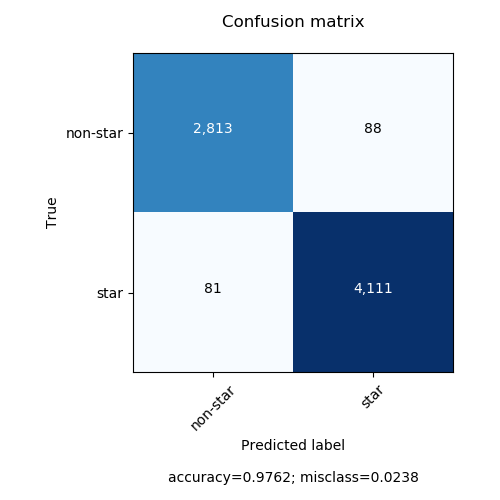

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [18]:
score_lr_0 = score(y_test,y_pred_lr_0,time1_lr_0 ,time2_lr_0)
score_lr_1 = score(y_test,y_pred_lr_1,time1_lr_1 ,time2_lr_1)
score_lr_2 = score(y_test,y_pred_lr_2,time1_lr_2 ,time2_lr_2)
score_lr_3 = score(y_test,y_pred_lr_3,time1_lr_3 ,time2_lr_3)
score_lr_4 = score(y_test,y_pred_lr_4,time1_lr_4 ,time2_lr_4)
score_lr_5 = score(y_test,y_pred_lr_5,time1_lr_5 ,time2_lr_5)
score_lr_6 = score(y_test,y_pred_lr_6,time1_lr_6 ,time2_lr_6)
score_lr_7 = score(y_test,y_pred_lr_7,time1_lr_7 ,time2_lr_7)
score_lr_8 = score(y_test,y_pred_lr_8,time1_lr_8 ,time2_lr_8)
score_lr_9 = score(y_test,y_pred_lr_9,time1_lr_9 ,time2_lr_9)

E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\program\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
m1_t = pd.DataFrame({
 'accuracy' : [score_lr_0[1],score_lr_1[1],score_lr_2 [1],score_lr_3[1],score_lr_4[1],score_lr_5[1],score_lr_6[1],score_lr_7[1],score_lr_8[1],score_lr_9[1]],
 'completeness' : [score_lr_0[2],score_lr_1[2],score_lr_2 [2],score_lr_3[2],score_lr_4[2],score_lr_5[2],score_lr_6[2],score_lr_7[2],score_lr_8[2],score_lr_9[2]],
 'contamination' : [score_lr_0[3],score_lr_1[3],score_lr_2 [3],score_lr_3[3],score_lr_4[3],score_lr_5[3],score_lr_6[3],score_lr_7[3],score_lr_8[3],score_lr_9[3]],
 'precision' : [score_lr_0[4],score_lr_1[4],score_lr_2 [4],score_lr_3[4],score_lr_4[4],score_lr_5[4],score_lr_6[4],score_lr_7[4],score_lr_8[4],score_lr_9[4]],
 'recall' : [score_lr_0[5],score_lr_1[5],score_lr_2 [5],score_lr_3[5],score_lr_4[5],score_lr_5[5],score_lr_6[5],score_lr_7[5],score_lr_8[5],score_lr_9[5]],
 'F1 score' : [score_lr_0[6],score_lr_1[6],score_lr_2 [6],score_lr_3[6],score_lr_4[6],score_lr_5[6],score_lr_6[6],score_lr_7[6],score_lr_8[6],score_lr_9[6]],
 'time span' : [score_lr_0[7],score_lr_1[7],score_lr_2 [7],score_lr_3[7],score_lr_4[7],score_lr_5[7],score_lr_6[7],score_lr_7[7],score_lr_8[7],score_lr_9[7]]
                })

m1_t.rename(index = {0: "score_lr_0", 
                     1: "score_lr_1",
                     2: "score_lr_2",
                     3: "score_lr_3",
                     4: "score_lr_4",
                     5: "score_lr_5",
                     6: "score_lr_6",
                     7: "score_lr_7",
                     8: "score_lr_8",
                     9: "score_lr_9"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_lr_0,0.612435,0.777778,0.358494,0.641506,0.777778,0.703100,00:00:00.982213
score_lr_1,0.961652,0.985185,0.048465,0.951535,0.985185,0.968068,00:00:00.962211
score_lr_2,0.971662,0.982796,0.030410,0.969590,0.982796,0.976148,00:04:16.192197
score_lr_3,0.946285,0.976583,0.064760,0.935240,0.976583,0.955465,00:00:02.632710
score_lr_4,0.409982,0.000000,0.000000,0.000000,0.000000,0.000000,00:00:01.776601
score_lr_5,0.899478,0.960335,0.119799,0.880201,0.960335,0.918524,00:00:00.918337
score_lr_6,0.951783,0.979211,0.058580,0.941420,0.979211,0.959944,00:00:22.297427
score_lr_7,0.409982,0.000000,0.000000,0.000000,0.000000,0.000000,00:00:10.212443
score_lr_8,0.953334,0.973716,0.051443,0.948557,0.973716,0.960972,00:00:01.421507
score_lr_9,0.965036,0.978495,0.037150,0.962850,0.978495,0.970609,00:00:01.074432


<IPython.core.display.Javascript object>


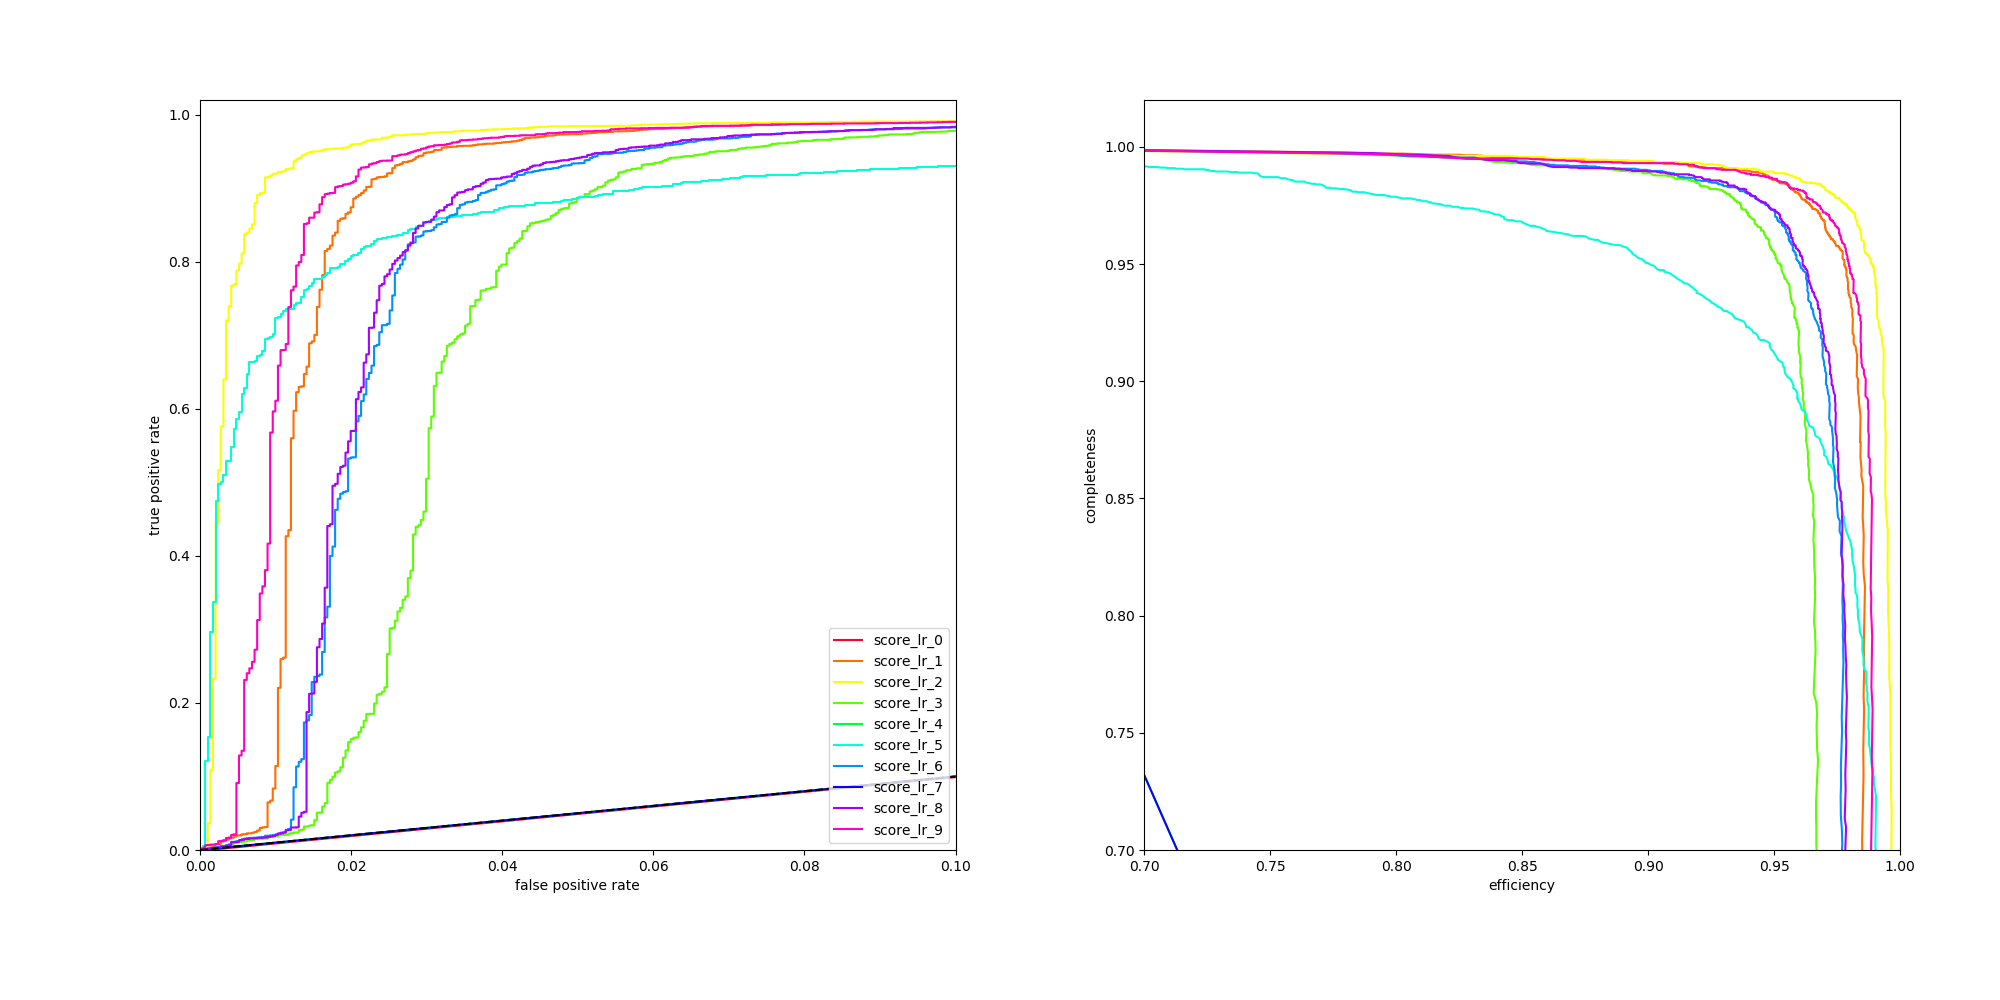

In [25]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_lr_0, y_probs_lr_1, y_probs_lr_2, y_probs_lr_3,y_probs_lr_4,y_probs_lr_5,y_probs_lr_6,y_probs_lr_7,y_probs_lr_8,y_probs_lr_9]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.1)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()